In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [5]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


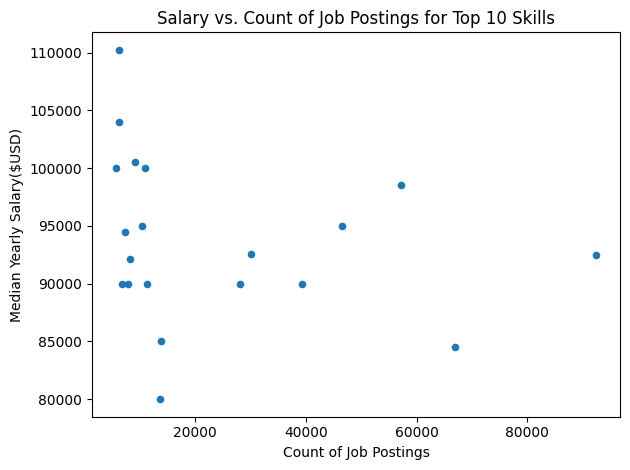

In [6]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

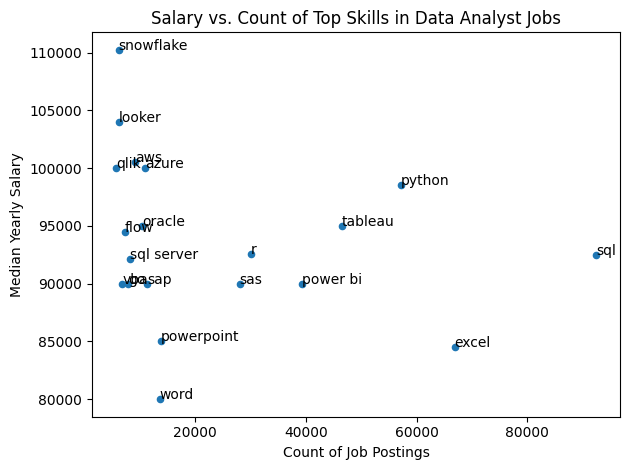

In [7]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()


In [9]:
pip install adjustText


   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
    --------------------------------------- 0.5/41.2 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.3/41.2 MB 4.8 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/41.2 MB 4.7 MB/s eta 0:00:09
   -- ------------------------------------- 2.9/41.2 MB 4.9 MB/s eta 0:00:08
   --- ------------------------------------ 3.9/41.2 MB 4.4 MB/s eta 0:00:09
   ---- ----------------------------------- 5.0/41.2 MB 4.1 MB/s eta 0:00:09
   ----- ---------------------------------- 6.0/41.2 MB 4.3 MB/s eta 0:00:09
   ------- -------------------------------- 7.6/41.2 MB 4.7 MB/s eta 0:00:08
   -------- ------------------------------- 9.2/41.2 MB 4.9 MB/s eta 0:00:07
   ---------- ----------------------------- 10.5/41.2 MB 5.1 MB/s eta 0:00:07
   ----------- ---------------------------- 12.1/41.2 MB 5.3 MB/s eta 0:00:06
   ------------- -------------------------- 13.6/41.2 MB 5.5 MB/s eta 0:00:06
  

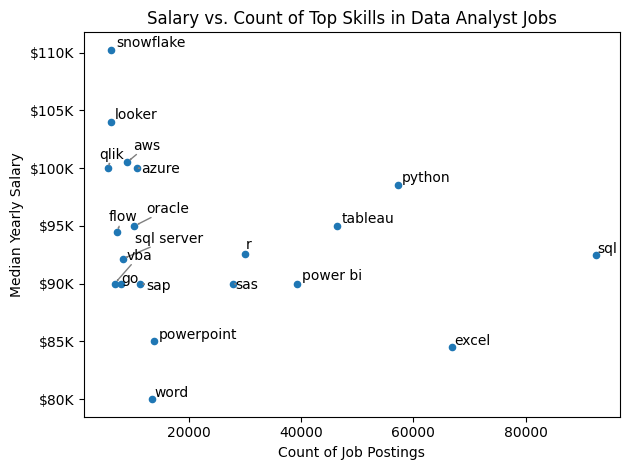

In [16]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points

texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()
